In [130]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import seaborn as sns

In [131]:
sim=[]
N = 1200

for i in range(N):
    sim.append(pd.read_csv(f'data_local/sim2/job_{i}.txt', sep="\t",encoding='iso-8859-1', on_bad_lines='skip'))
    

In [132]:
lichtAn = pd.read_csv('data_local/TheoCanLightDark_lon.txt', sep='\t')
lichtAus = pd.read_csv('data_local/TheoCanLightDark_loff.txt', sep='\t')

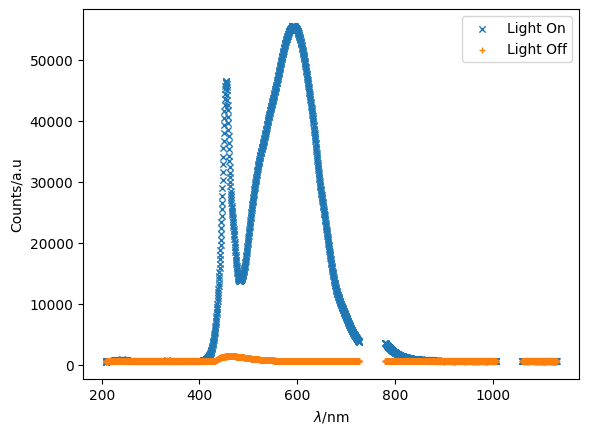

In [133]:
plt.scatter(lichtAn[lichtAn.columns[0]],lichtAn[lichtAn.columns[2]],s=20,marker='x',linewidths=1,label='Light On')
plt.scatter(lichtAus[lichtAus.columns[0]],lichtAus[lichtAus.columns[2]],s=20,marker='+',linewidths=1,label='Light Off')
plt.legend()
plt.xlabel(r'$\lambda/$nm')
plt.ylabel('Counts/a.u');

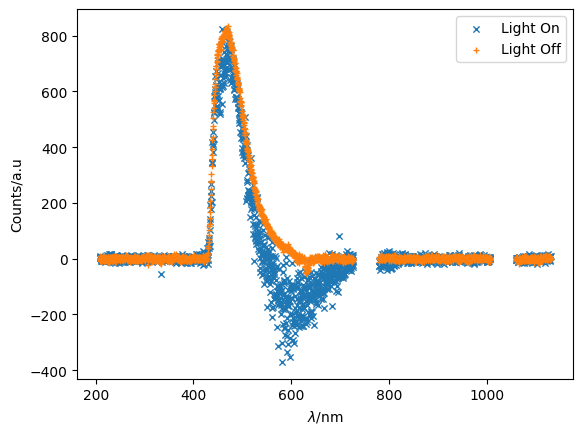

In [134]:
plt.scatter(lichtAn[lichtAn.columns[0]],lichtAn[lichtAn.columns[2]]-lichtAn[lichtAn.columns[1]],s=20,marker='x',linewidths=1,label='Light On')
plt.scatter(lichtAus[lichtAus.columns[0]],lichtAus[lichtAus.columns[2]]-lichtAus[lichtAus.columns[1]],s=20,marker='+',linewidths=1,label='Light Off')
plt.legend()
plt.xlabel(r'$\lambda/$nm')
plt.ylabel('Counts/a.u');

In [135]:
np.linspace(-6,31.8,15), np.linspace(-18,26.8,15)

(array([-6. , -3.3, -0.6,  2.1,  4.8,  7.5, 10.2, 12.9, 15.6, 18.3, 21. ,
        23.7, 26.4, 29.1, 31.8]),
 array([-18. , -14.8, -11.6,  -8.4,  -5.2,  -2. ,   1.2,   4.4,   7.6,
         10.8,  14. ,  17.2,  20.4,  23.6,  26.8]))

In [136]:
radialC = np.empty((15,15))
radialDC = np.empty((15,15))
for (i,h) in enumerate(np.linspace(-18,26.8,15)):
    for (j,v) in enumerate(np.linspace(-6,31.8,15)):
        # print(i,j,"   ",h,v.round(1))
        try:
            radC_ = pd.read_csv(f"data_local/TheoCanRadial/Attenuation_h={h:.1f}deg_v={v:.1f}deg_x=0mm.txt",sep="\t")
            radDC_ = pd.read_csv(f"data_local/TheoCanRadial/DarkCounts_h={h:.1f}deg_v={v:.1f}deg.txt",sep="\t")
        except:
            try:
                radC_ = pd.read_csv(f"data_local/TheoCanRadial/Attenuation_h={h:.0f}deg_v={v:.1f}deg_x=0mm.txt",sep="\t")
                radDC_ = pd.read_csv(f"data_local/TheoCanRadial/DarkCounts_h={h:.0f}deg_v={v:.1f}deg.txt",sep="\t")
            except:
                try:
                    radC_ = pd.read_csv(f"data_local/TheoCanRadial/Attenuation_h={h:.1f}deg_v={v:.0f}deg_x=0mm.txt",sep="\t")
                    radDC_ = pd.read_csv(f"data_local/TheoCanRadial/DarkCounts_h={h:.1f}deg_v={v:.0f}deg.txt",sep="\t")
                except:
                    radC_ = pd.read_csv(f"data_local/TheoCanRadial/Attenuation_h={h:.0f}deg_v={v:.0f}deg_x=0mm.txt",sep="\t")
                    radDC_ = pd.read_csv(f"data_local/TheoCanRadial/DarkCounts_h={h:.0f}deg_v={v:.0f}deg.txt",sep="\t")
        radialC[i,j] =  radC_[radC_.columns[-1]].sum()
        radialDC[i,j] =  radDC_[radDC_.columns[-1]].sum()

rad = (radialC - radialDC)/np.max((radialC - radialDC))

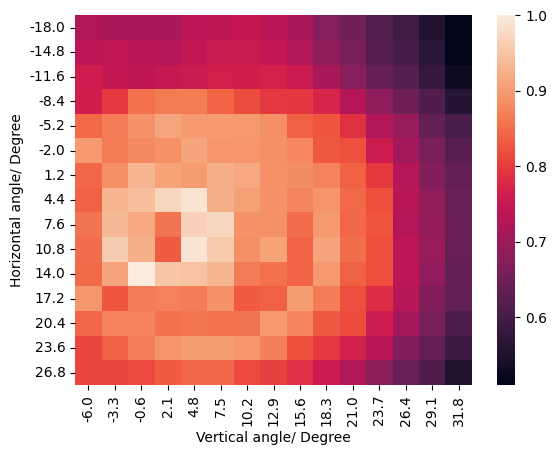

In [137]:
sns.heatmap(rad, yticklabels=np.linspace(-18,26.8,15).round(1), xticklabels=np.linspace(-6,31.8,15).round(1))
plt.xlabel('Vertical angle/ Degree')
plt.ylabel('Horizontal angle/ Degree');

In [138]:
sim[0].head()

,# y_exit,z_exit,x_start,y_start,z_start,px_start,py_start,pz_start,reflCoCl,reflClCl,wl,gpsPosX,length_core,length_clad,rayleighScatterings
0,-0.026978,-0.061619,2400.019897,-0.051878,0.096635,0.948434,0.162628,-0.272077,3649.0,0.0,472.743103,2400.0,2530.557861,0.000000,0.0
1,-0.055254,0.050902,2400.000732,0.085666,0.015889,0.977825,-0.139056,-0.156593,2674.0,0.0,504.521210,2400.0,2454.456055,0.000000,0.0
2,0.049212,0.065583,2399.990967,0.006511,-0.025208,0.917937,-0.225034,0.326729,0.0,3894.0,442.621185,2400.0,2204.132568,381.522583,0.0
3,-0.018177,-0.106197,2400.062012,-0.043234,-0.098842,0.885576,0.074564,-0.458470,0.0,5517.0,484.213989,2400.0,2210.260498,466.030212,0.0
4,0.050591,0.043467,2400.000977,-0.004035,-0.069628,0.971248,-0.103995,-0.214154,2757.0,0.0,489.916565,2400.0,2470.986084,0.000000,0.0


In [139]:
col = sim[0].columns

In [140]:
sim[11]

,# y_exit,z_exit,x_start,y_start,z_start,px_start,py_start,pz_start,reflCoCl,reflClCl,wl,gpsPosX,length_core,length_clad,rayleighScatterings
0,-0.051869,-0.020329,1300.022152,0.033617,-0.076437,0.970474,-0.067528,-0.231562,1683.0,0.0,543.888916,1300.0,1339.580566,0.000000,0.0
1,-0.036378,-0.026129,1299.988216,0.050202,0.023712,0.988455,0.100771,0.113144,924.0,0.0,613.010315,1300.0,1315.167114,0.000000,0.0
2,-0.093041,0.005353,1300.002407,0.090508,0.020294,0.969840,0.131994,-0.204908,2431.0,0.0,480.033203,1300.0,1340.455444,0.000000,0.0
3,0.095751,-0.030576,1388.692551,0.005965,0.106594,0.854762,0.459174,0.241952,6910.0,0.0,536.355774,1300.0,1624.609009,0.000000,0.0
4,-0.021918,0.094844,1300.002239,0.044114,0.045938,0.937413,0.050802,-0.344493,2469.0,0.0,457.751587,1300.0,1386.793335,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9383,0.052775,-0.078756,1299.993877,0.032892,-0.010663,0.993714,0.098682,0.052855,684.0,0.0,494.494110,1300.0,1308.214111,0.000000,0.0
9384,-0.022310,-0.029635,1299.981731,0.039127,-0.026997,0.943886,-0.081823,0.319976,2156.0,0.0,446.503540,1300.0,1377.242310,0.000000,0.0
9385,-0.053371,0.054967,1300.115276,-0.012270,0.034190,0.964679,0.213360,0.154508,1702.0,0.0,443.030121,1300.0,1347.692261,0.000000,0.0
9386,0.078270,-0.045223,1300.018627,0.091584,0.034421,0.922218,0.279042,-0.267674,4150.0,0.0,580.840515,1300.0,1409.682617,0.000000,0.0


In [141]:
sim_ = sim[0]
for i in range(N):
    sim[i]['r_exit'] = np.sqrt(sim[i][col[0]]**2 + sim[i][col[1]]**2)
    sim_['r_exit'] = np.sqrt(sim_[col[0]]**2 + sim_[col[1]]**2)
    sim[i] = sim[i][((sim[i]['r_exit']<0.125) & (sim[i]['rayleighScatterings']==0.0))]

(array([ 513., 1529., 2864., 1421.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.]),
 array([7.40571761e-04, 3.45059419e-02, 6.82713120e-02, 1.02036682e-01,
        1.35802052e-01, 1.69567422e-01, 2.03332792e-01, 2.37098163e-01,
        2.70863533e-01, 3.04628903e-01, 3.38394273e-01, 3.72159643e-01,
        4.05925013e-01, 4.39690383e-01, 4.73455753e-01, 5.07221123e-01,
        5.40986494e-01, 5.74751864e-01, 6.08517234e-01, 6.42282604e-01,
        6.76047974e-01, 7.09813344e-01, 7.43578714e-01, 7.77344084e-01,
        8.11109455e-01, 8.44874825e-01, 8.78640195e-01, 9.12405565e-01,
        9.46170935e-01, 9.79936305e-01, 1.01370168e+00]),
 [<matplotlib.patches.Polygon at 0x7f275a25d7b0>])

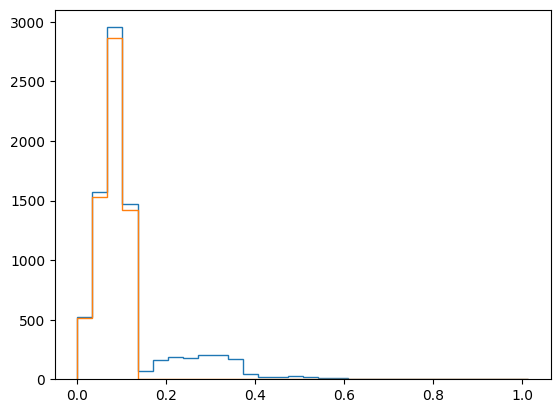

In [142]:
counts, bins, stff = plt.hist(sim_['r_exit'],histtype='step', bins=30)
plt.hist(sim[0]['r_exit'],histtype='step', bins=bins)

In [149]:
simKern = []
simMantel = []

for i in range(N):
    simKern.append(sim[i][(sim[i]['length_clad']==0.0)])
    simMantel.append(sim[i][(sim[i]['length_clad']!=0.0)])

(33280, 67952, 101232)

In [143]:
angleC = []
angleDC = []
for i in range(44):
    angleC.append(pd.read_csv(f'data_local/TheoCanAngle/Attenuation_h={i}deg_v=0deg_x=0mm.txt', sep='\t'))
    angleC.append(pd.read_csv(f'data_local/TheoCanAngle/Attenuation_h={i}.5deg_v=0deg_x=0mm.txt', sep='\t'))
    angleC.append(pd.read_csv(f'data_local/TheoCanAngle/DarkCounts_h={i}deg_v=0deg.txt', sep='\t'))
    angleC.append(pd.read_csv(f'data_local/TheoCanAngle/DarkCounts_h={i}.5deg_v=0deg.txt', sep='\t'))